In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
df1 =df.drop('CustomerID',axis='columns')
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Find NaN Value 

In [8]:
df1.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Create Dummy Values

In [9]:
df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
dummies =pd.get_dummies(df1.Gender)
dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [11]:
df2=pd.concat([df1.drop('Gender',axis='columns'),dummies.drop('Male',axis='columns')],axis='columns')
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


Text(0, 0.5, 'Count')

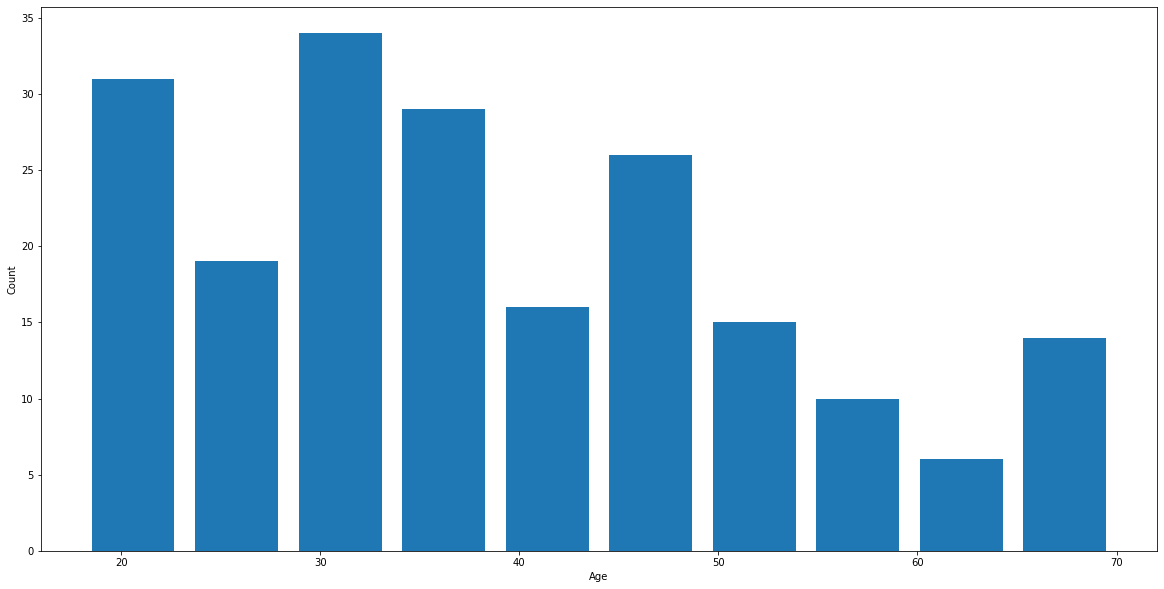

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df.Age,rwidth=0.8)
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

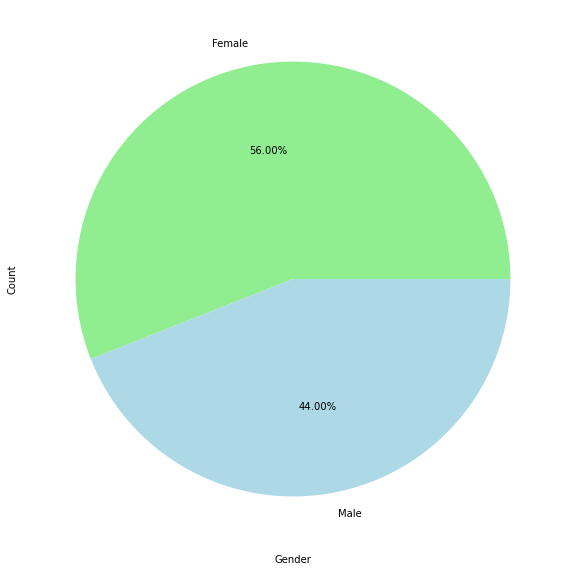

In [13]:
label=['Female','Male']
colors=['lightgreen','lightblue']
plt.pie(df['Gender'].value_counts(),labels=label,autopct = '%.2f%%',colors=colors)
plt.xlabel("Gender")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

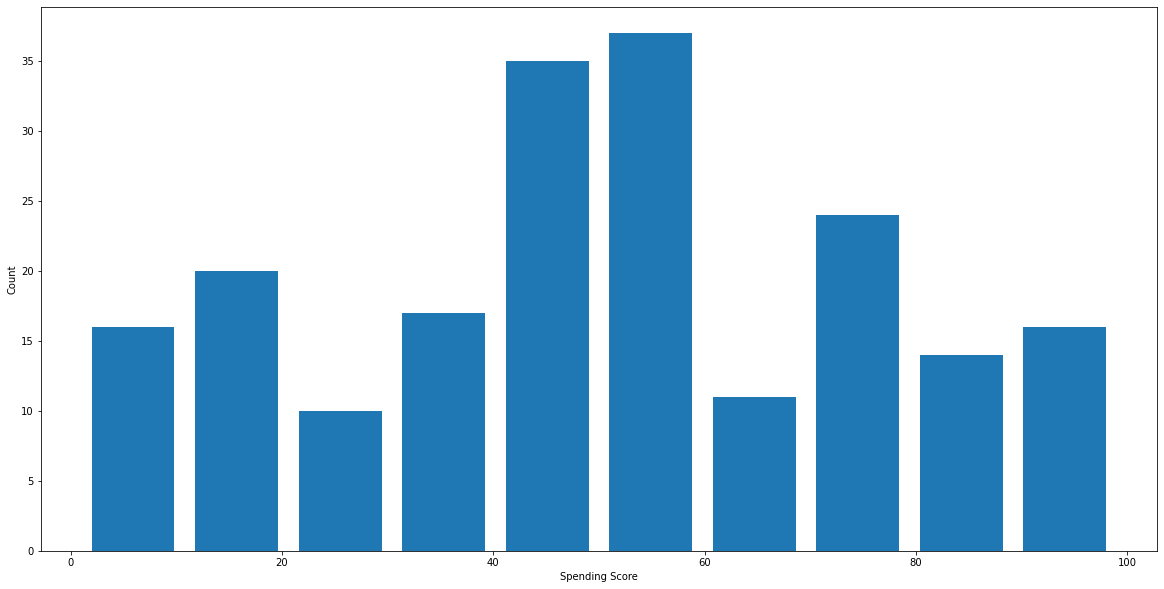

In [14]:
plt.hist(df['Spending Score (1-100)'],rwidth=0.8)
plt.xlabel("Spending Score")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

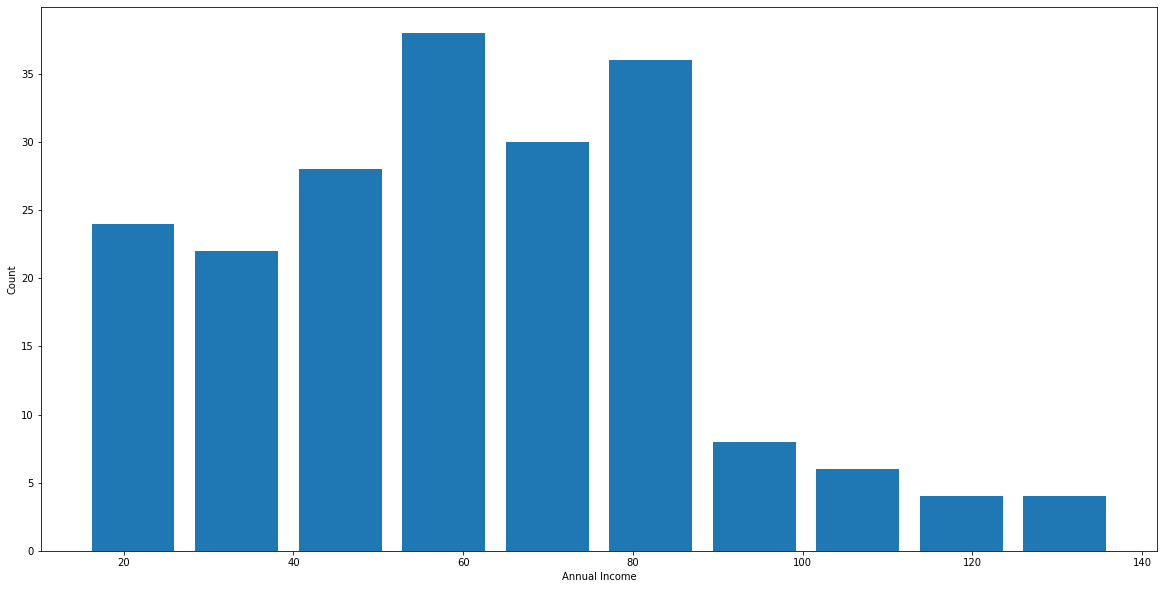

In [15]:
plt.hist(df['Annual Income (k$)'],rwidth=0.8)
plt.xlabel("Annual Income")
plt.ylabel("Count")

Text(0, 0.5, 'Spending Score (1-100)')

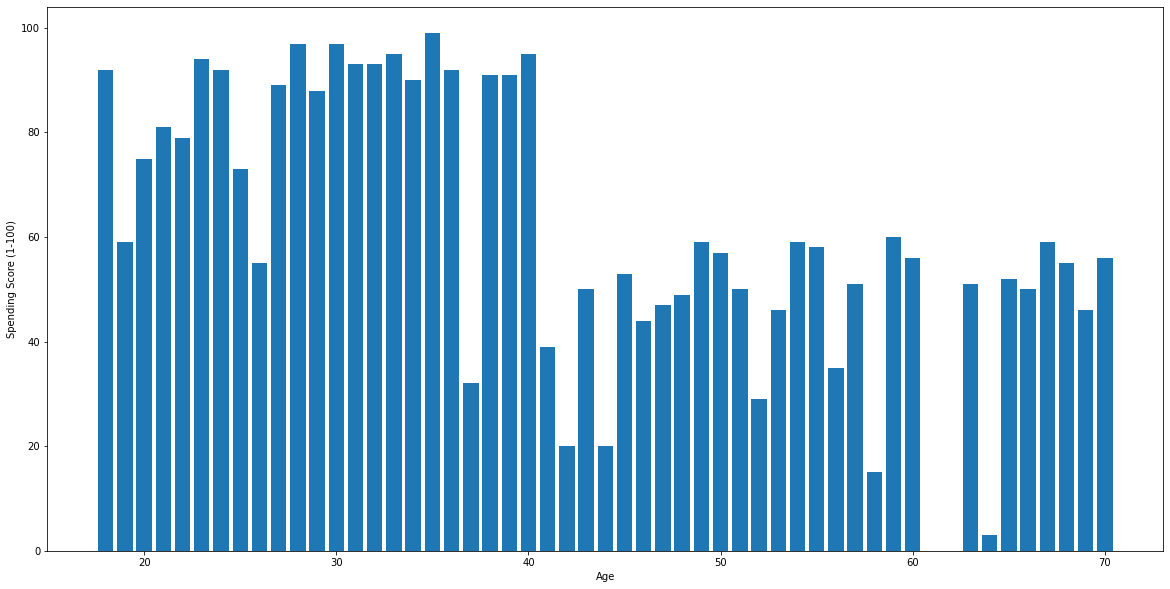

In [16]:
plt.bar(df.Age,df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

Text(0, 0.5, 'Spending Score (1-100)')

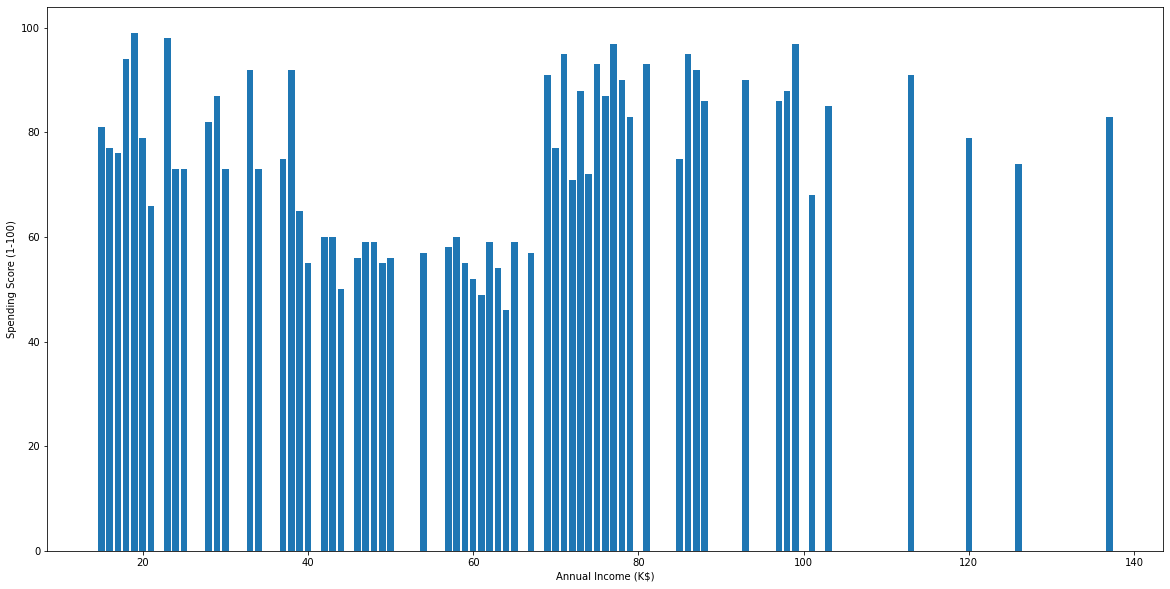

In [17]:
plt.bar(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100)")

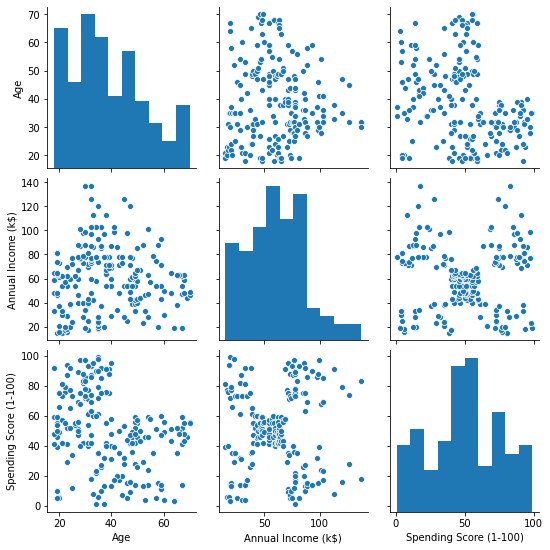

In [18]:
sn.pairplot(df1)
# plt.title("Pairplot of data ",fontsize=20)
plt.show()

In [19]:
df2.corr()

,Age,Annual Income (k$),Spending Score (1-100),Female
Age,1.000000,-0.012398,-0.327227,-0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,-0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,0.058109
Female,-0.060867,-0.056410,0.058109,1.000000


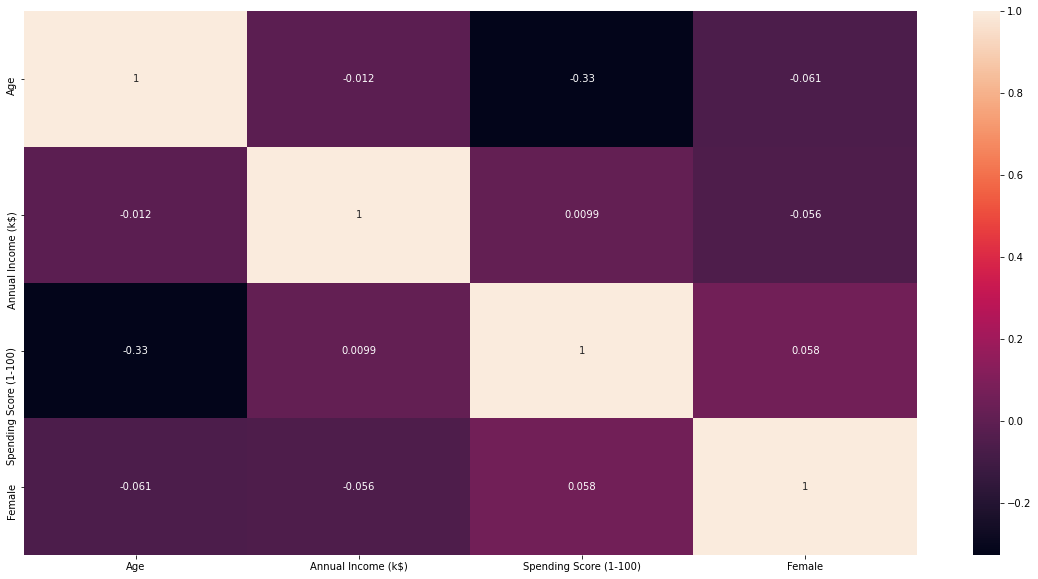

In [20]:
sn.heatmap(df2.corr(),annot=True)

In [21]:
df2['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [22]:
df2['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [23]:
df2['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [24]:
df2

,Age,Annual Income (k$),Spending Score (1-100),Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


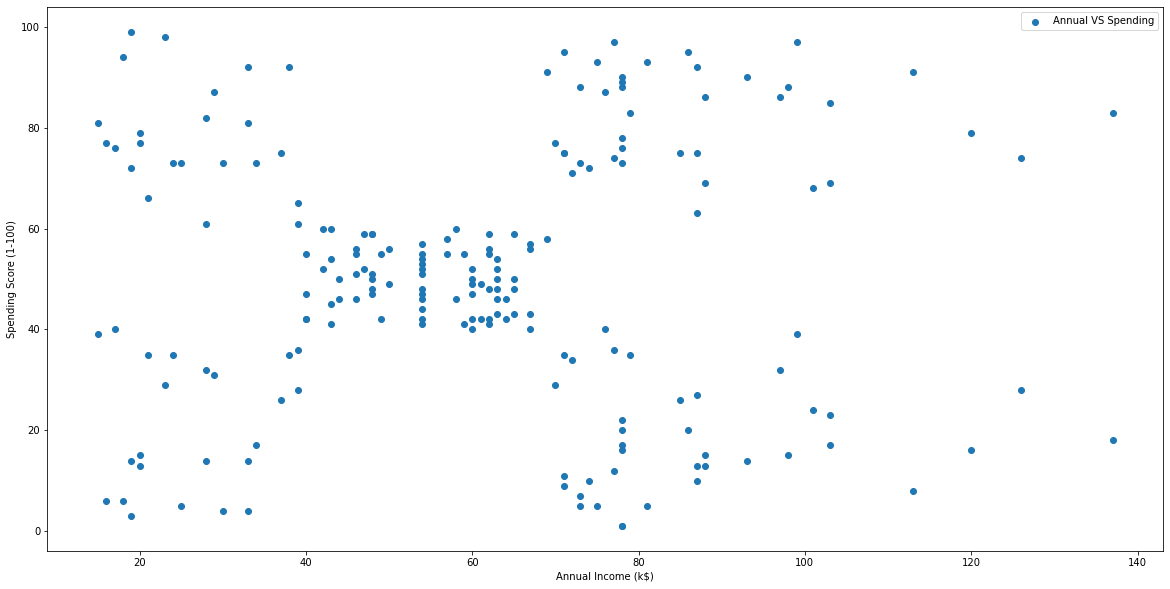

In [25]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],label='Annual VS Spending')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()

In [26]:
X = df2.drop('Spending Score (1-100)',axis='columns')
Y = df2['Spending Score (1-100)']

In [27]:
X.head()

,Age,Annual Income (k$),Female
0,19,15,0
1,21,15,0
2,20,16,1
3,23,16,1
4,31,17,1


In [28]:
Y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

In [29]:
from sklearn.cluster import KMeans

In [30]:
km = KMeans(n_clusters=5)

In [31]:
y_predicted=km.fit_predict(df1[['Annual Income (k$)','Spending Score (1-100)']])
centroids  = km.cluster_centers_
print(centroids)

[[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]]


In [32]:
y_predicted

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [33]:
df2['cluster']=y_predicted

In [34]:
df2

,Age,Annual Income (k$),Spending Score (1-100),Female,cluster
0,19,15,39,0,1
1,21,15,81,0,3
2,20,16,6,1,1
3,23,16,77,1,3
4,31,17,40,1,1
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,2
197,32,126,74,0,0
198,32,137,18,0,2


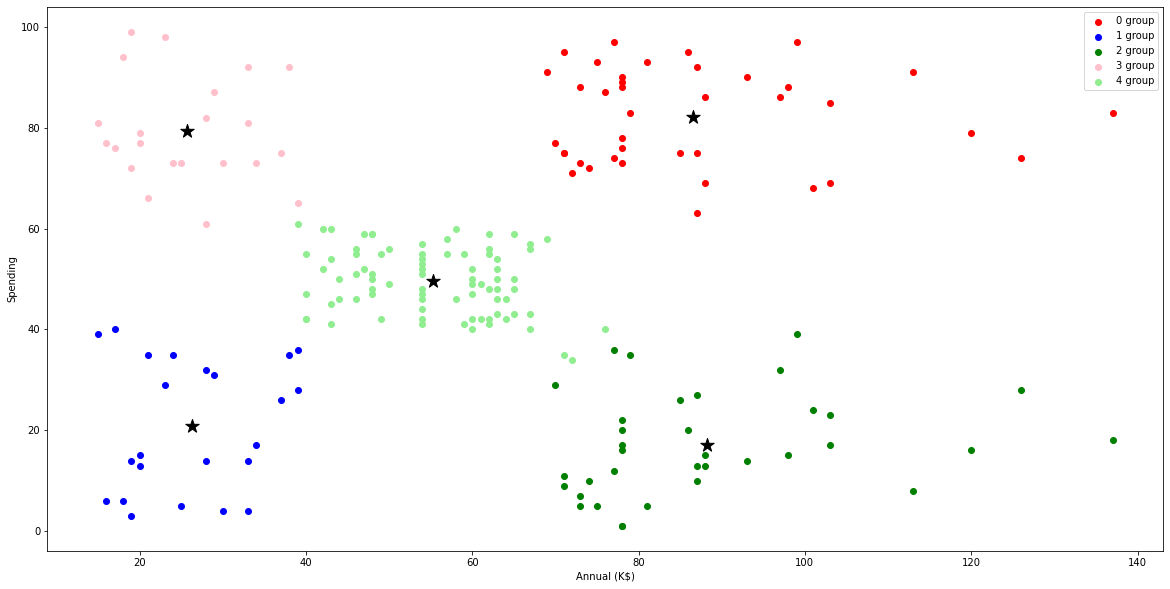

In [35]:
df11=df2[df2.cluster==0]
df21=df2[df2.cluster==1]
df31=df2[df2.cluster==2]
df41=df2[df2.cluster==3]
df51=df2[df2.cluster==4]
# df61=df2[df2.cluster==5]
# df71=df2[df2.cluster==6]
# df81=df2[df2.cluster==7]

plt.scatter(df11['Annual Income (k$)'],df11['Spending Score (1-100)'],color='red',label='0 group')
plt.scatter(df21['Annual Income (k$)'],df21['Spending Score (1-100)'],color='blue',label='1 group')
plt.scatter(df31['Annual Income (k$)'],df31['Spending Score (1-100)'],color='green',label='2 group')
plt.scatter(df41['Annual Income (k$)'],df41['Spending Score (1-100)'],color='pink',label='3 group')
plt.scatter(df51['Annual Income (k$)'],df51['Spending Score (1-100)'],color='lightgreen',label='4 group')

plt.scatter(centroids[:,0],centroids[:,1],color='black',marker='*',s=200)
plt.xlabel('Annual (K$)')
plt.ylabel('Spending')
plt.legend()
# plt.grid()
plt.show()

In [36]:
sse=[]
k_rng=range(1,30)
for i in k_rng:
    km=KMeans(n_clusters=i)
    km.fit(df1[['Annual Income (k$)','Spending Score (1-100)']])
    print(km.inertia_)
    sse.append(km.inertia_)

269981.28000000014
181363.59595959607
106348.37306211119
73679.78903948837
44448.45544793369
37239.83554245604
31609.77704998489
25028.020475269397
21841.978256748636
20040.51384907528
17508.97057740007
16060.401814851819
14733.817418203456
13198.069252299421
11954.951517256688
10914.862298228087
9981.45379006958
9338.910714285714
8756.334959173197
8042.986212055917
7736.66045066045
7133.099649370235
6757.312757588414
6382.038339438345
6200.0770673770685
5703.767093871044
5467.556493506495
5056.047366522367
4886.385864135867


Text(0, 0.5, 'Sum of Squared Error')

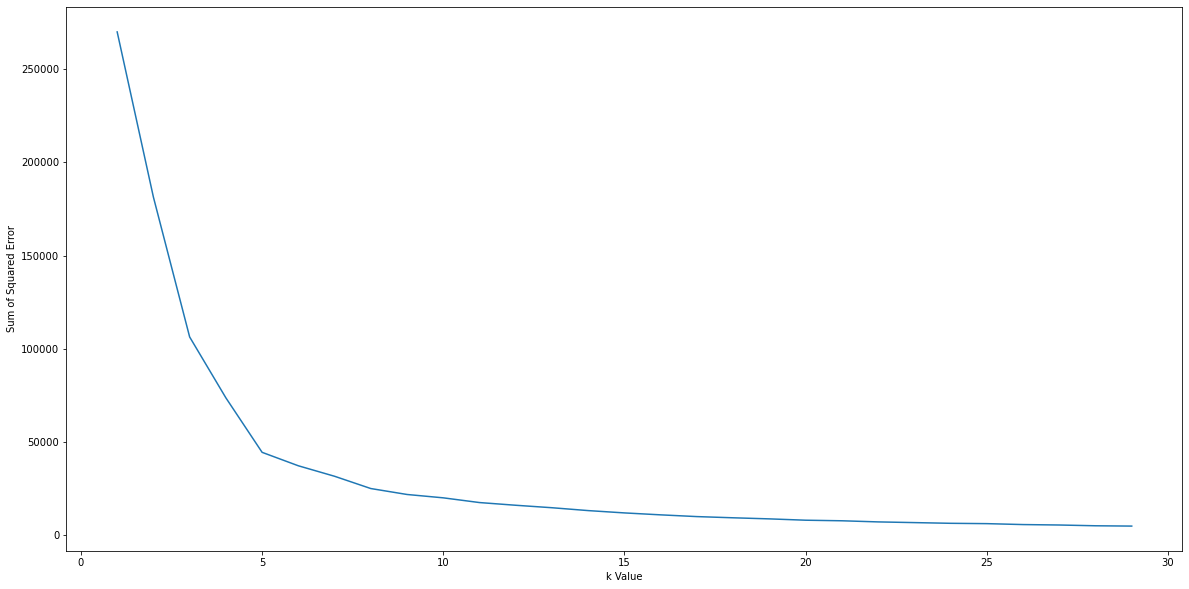

In [37]:
plt.plot(k_rng,sse)
plt.xlabel('k Value')
plt.ylabel('Sum of Squared Error')